In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from py.plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [80]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='State space for default values', 
                    plot='dom_frequ', colorbar=True, colorbar_title='dom. frequency'):
    
    p_colors = cm.get_cmap('Accent', 4)
    
    frequs = df.pivot_table(plot, columns=xaxis, index=yaxis)
 #   downs = df.pivot_table('down_duration', columns=xaxis, index=yaxis)
 #   ups = df.pivot_table('up_duration', columns=xaxis, index=yaxis)
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    
    vals=df[plot].to_numpy()
    mini = min(vals)
    if any(np.isinf(vals)):
        maxi=20
    else:
        maxi = max(vals)
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(frequs, nmb_labels)
    
  #  pos = ax.imshow(stabis, origin='lower', vmin=1, vmax=4, aspect='auto', interpolation='gaussian', cmap='gist_gray')#cmap=p_colors) #
    pos = ax.imshow(frequs, origin='lower', vmin=0, vmax=0.03, aspect='auto', cmap='viridis') #
  #  ax.contour(downs, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu', interpolation='gaussian')
  #  ax.contour(ups, origin='lower', vmin=0, vmax=2, levels=20, cmap='RdGy', linestyles='dashed', interpolation='gaussian')
    
    ax.set(title=title)
    
    
    
    if scatter:
        scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
        scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
        xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
        ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
        ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], ynodes[list(stabis.index.values).index(scatter1)], s=150, c='yellow', marker='*', zorder=2) 
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    cbar_ticks=np.linspace(0,0.1,4)
    cbar_ticks=np.around(cbar_ticks, decimals=2)
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel(colorbar_title, rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_ticks)
        
        
        cbar.minorticks_on()
        
    
        
    plt.legend(loc='lower right')
    
    
    
    plt.show()

In [81]:
#df_default = pd.read_csv('csv/deault_space_frequs.csv')

In [82]:
#df_default

In [83]:
#plotDiscreteMap(df_default, title='Default down-state space', # + r'$LC_{ei}$' + ' frequencies', 
#                plot='down_space', colorbar = True, colorbar_title='space of down-states')

In [84]:
df = pd.read_csv('csv/adaps_temp_frequs.csv')


#df = df[df['I_e']>=-1]
#df = df[df['I_e']<=1]
#df = df[df['I_i']>=-1]
#df = df[df['I_i']<=1]

In [85]:
#df['down_duration'][df['down_duration'].isnull()] = float('inf')
df

,Unnamed: 0,I_e,I_i,dom_frequ,down_duration,up_duration
0,0,-0.166667,-1.000000,108.642578,0.042744,0.030892
1,0,-0.133333,-1.000000,112.304688,0.039110,0.032125
2,0,-0.133333,-0.966667,112.304688,0.039800,0.031435
3,0,-0.100000,-1.000000,114.746094,0.036202,0.033517
4,0,-0.100000,-0.966667,114.746094,0.036748,0.032971
...,...,...,...,...,...,...
258,0,0.600000,-0.433333,40.283203,0.016486,0.182108
259,0,0.600000,-0.400000,40.283203,0.017020,0.181574
260,0,0.600000,-0.366667,39.062500,0.018071,0.186729
261,0,0.633333,-0.433333,4.882812,0.010916,1.627484


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4257/3391708365.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4257/3391708365.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


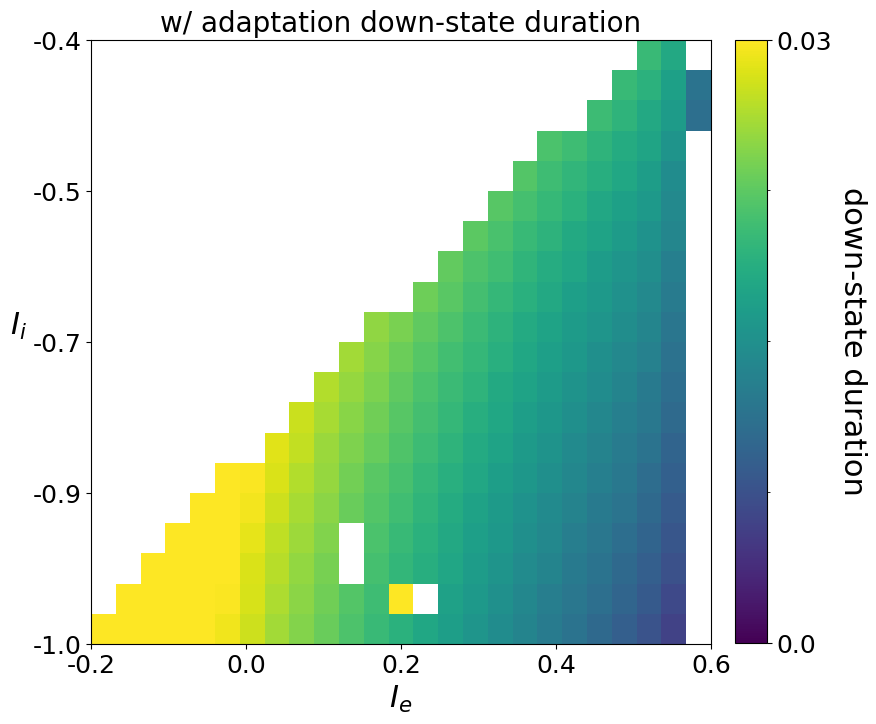

In [86]:
plotDiscreteMap(df, title='w/ adaptation down-state duration', #+ r'$LC_{ae}$' + ' frequencies', 
                plot='down_duration', colorbar = True, colorbar_title='down-state duration')

In [89]:
a = max(df['down_duration'])

In [90]:
df['down_duration'][df['down_duration']==a]=0

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4257/664855847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['down_duration'][df['down_duration']==a]=0


In [91]:
max(df['down_duration'])

0.0427438310112359